#**Forecasting with Arima Model**

**Objective:**
To apply ARIMA modeling techniques to forecast the number of app updates in the Google Play Store
for the next 12 months based on historical data.

**Dataset:**
**Google Play Store Dataset**
* Description: Contains information about the google play store.
* Use Case: Ideal for time series analysis to predict continuous outcomes like the downloads based
on various features (e.g., ratings, reviews, installs).


# **Import Libraries and Load Datasets**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#**1. Data Cleaning and Preparation**

* **Task: Clean the dataset by handling missing values, removing duplicates, and converting fields like
'Reviews', 'Size', 'Installs', and 'Price' to a numerical format for analysis.**

* **Skills Assessed: Data cleaning, data type conversion.**

In [ ]:
data = pd.read_csv('/content/googleplaystore.csv')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
def numeric(value):

    num, sign = value[:-1], value[-1]

    try:
      if sign == '+':
        return 1000

      if sign.lower() == 'm':
        return float(num)*1000000
      if sign.lower() == 'k':
        return float(num)*1000

    except:
      return 0



data['Size'] = [numeric(value) for value in data['Size']]
data['Size'].fillna(data['Size'].mean(),inplace=True)


In [ ]:
def review(value):
  try:
    return int(value)
  except:
    num, sign = value[:-1], value[-1]
    return float(num)*1000000


data['Reviews'] = [review(i) for i in data['Reviews']]

In [ ]:
def installs(category):
    if category == 'Free':
        return 0
    elif '+' in category:
        return int(category.replace('+', '').replace(',', ''))
    else:
        return int(category)


data['Installs'] = [installs(category) for category in data['Installs']]

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
def prices(price):
  if price == 'Everyone':
   return 0
  else:
    numeric_price = float(price.replace('$', '').replace(',', ''))
    return numeric_price

data['Price'] = [prices(p) for p in data['Price']]


In [ ]:
data[['Reviews','Size','Installs','Price']].head()

,Reviews,Size,Installs,Price
0,159.0,19000000.0,10000,0.0
1,967.0,14000000.0,500000,0.0
2,87510.0,8700000.0,5000000,0.0
3,215644.0,25000000.0,50000000,0.0
4,967.0,2800000.0,100000,0.0


In [ ]:

data['Rating'].fillna(data['Rating'].mean(),inplace=True)
data['Rating'].isna().sum()


0

#**2. Exploratory Data Analysis(EDA)**

* **Task:** Perform EDA to uncover trends in the dataset. This may include analyzing the distribution
of app ratings, understanding the proportion of free vs. paid apps, and identifying which
categories have the most apps

* **Skills Assessed:** Data visualization, descriptive statistics, pandas proficiency.

count    1.084100e+04
mean     4.443887e+05
std      2.927728e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.479800e+04
max      7.815831e+07
Name: Reviews, dtype: float64


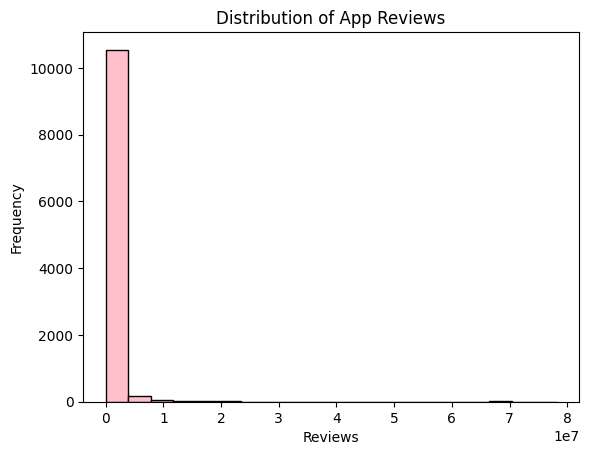

In [ ]:
print(data['Reviews'].describe())
plt.hist(data['Reviews'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of App Reviews')
plt.show()

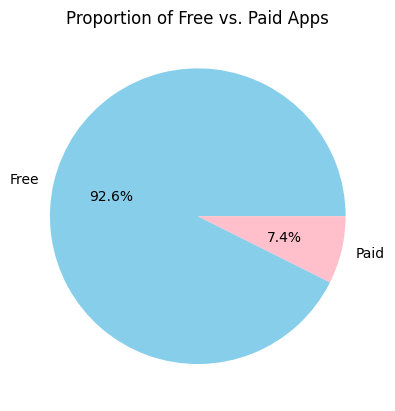

In [ ]:
free_apps = data[data['Price'] == 0].shape[0]
paid_apps = data[data['Price'] > 0].shape[0]
labels = ['Free', 'Paid']
sizes = [free_apps, paid_apps]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Proportion of Free vs. Paid Apps')
plt.show()

#**3. Category Analysis**
* **Task:** Analyze the app categories to find out which category has the highest average rating, the
most reviews, and the most apps. Additionally, investigate the relationship between category and
app size or price.
* **Skills Assessed:** Groupby operations, aggregation, data visualization.

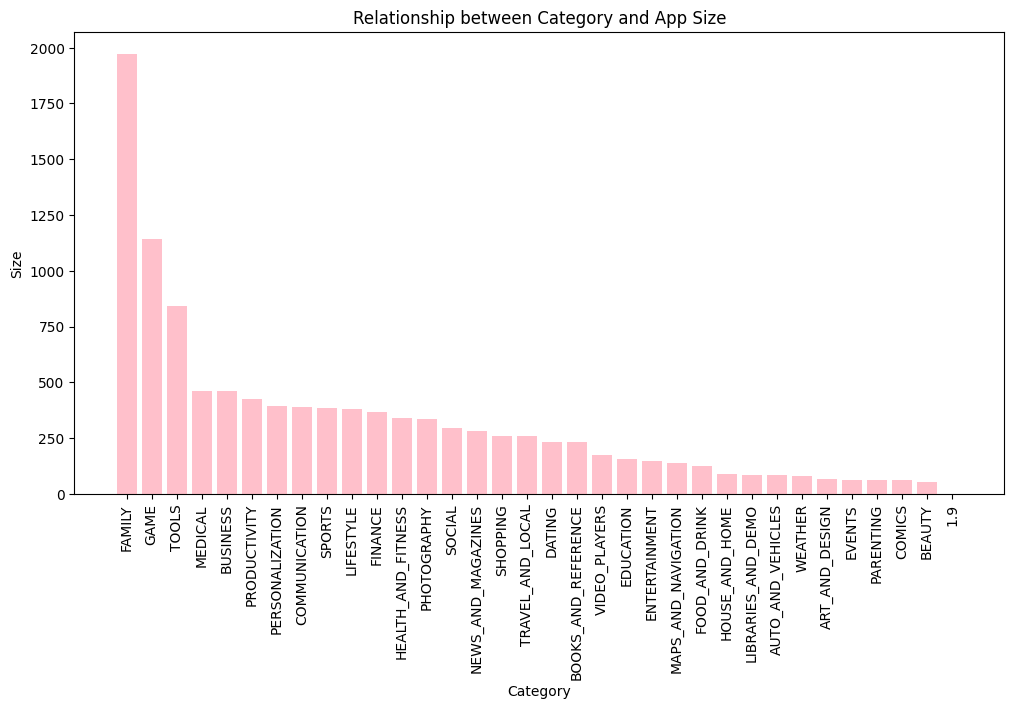

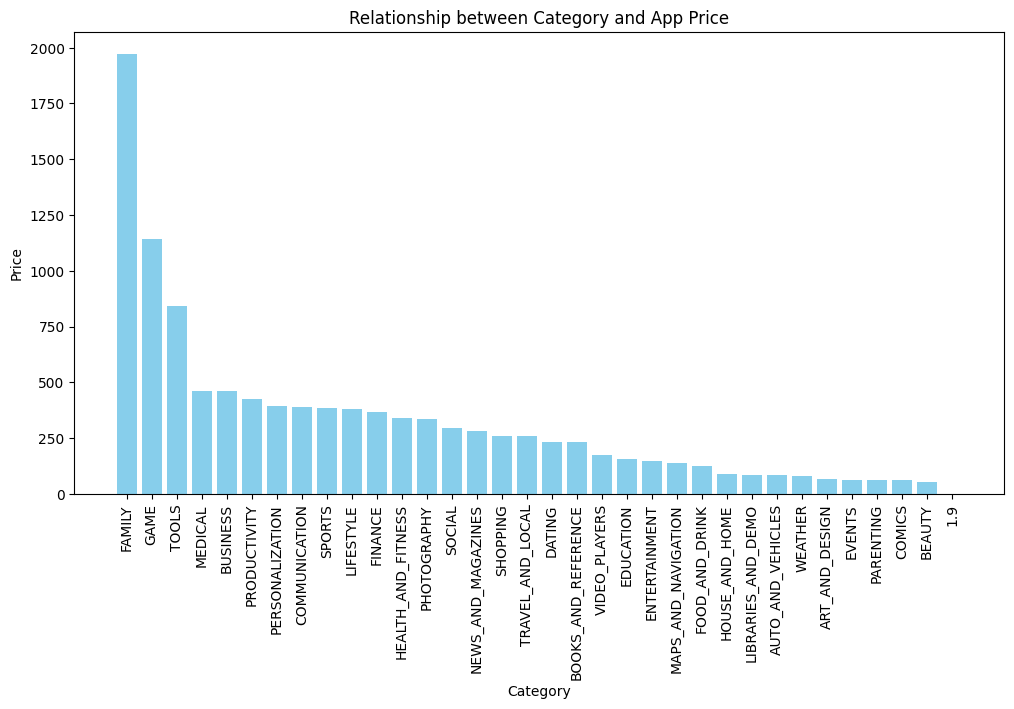

Category with the highest average rating: 1.9 with a rating of 19.0
Category with the most reviews: GAME with 1585422349.0 reviews
Category with the most apps: FAMILY with 1972 apps

Category Statistics:
                        Rating  Total Reviews  App Count
Category                                                
1.9                  19.000000   3.000000e+06          1
ART_AND_DESIGN        4.350462   1.714440e+06         65
AUTO_AND_VEHICLES     4.190824   1.163666e+06         85
BEAUTY                4.260882   3.962400e+05         53
BOOKS_AND_REFERENCE   4.311026   2.195907e+07        231
BUSINESS              4.145987   1.395455e+07        460
COMICS                4.156445   3.383276e+06         60
COMMUNICATION         4.163842   8.154623e+08        387
DATING                4.007864   7.291278e+06        234
EDUCATION             4.387778   3.959579e+07        156
ENTERTAINMENT         4.126174   5.917815e+07        149
EVENTS                4.363647   1.610180e+05         6

In [ ]:
cat_stats = data.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum', 'App': 'count'})
cat_stats = cat_stats.rename(columns={'App': 'App Count', 'Reviews': 'Total Reviews'})

# category with the highest average rating
highest_rating_cat = cat_stats['Rating'].idxmax()
highest_rating = cat_stats['Rating'].max()

# category with the most reviews
most_reviews_cat = cat_stats['Total Reviews'].idxmax()
most_reviews = cat_stats['Total Reviews'].max()

# category with the most apps
most_apps_cat = cat_stats['App Count'].idxmax()
most_apps = cat_stats['App Count'].max()

# relationship between category and app size or price
cat_counts = data['Category'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(cat_counts.index,
cat_counts.values, color= 'pink')
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Relationship between Category and App Size')
plt.xticks(rotation=90)
plt.show()

cat_counts = data['Category'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(cat_counts.index,
cat_counts.values, color= 'skyblue')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Relationship between Category and App Price')
plt.xticks(rotation=90)
plt.show()

# results
print("Category with the highest average rating:", highest_rating_cat, "with a rating of", highest_rating)
print("Category with the most reviews:", most_reviews_cat, "with", most_reviews, "reviews")
print("Category with the most apps:", most_apps_cat, "with", most_apps, "apps")

# Display category statistics
print("\nCategory Statistics:")
print(cat_stats)

#**4. Rating Prediction Model**
* **Task:** Build a model to predict the rating of an app based on its features (e.g., Reviews, Size,
Installs, Type, Price, Content Rating). Split the data into training and testing sets, select relevant
features, and evaluate the model's performance.
* **Skills Assessed:** Machine learning model building, feature selection, model evaluation.

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
category = pd.get_dummies(data[['Type','Content Rating']],drop_first=True)
X = pd.concat([data.drop(['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver'],axis=1),category],axis=1)

Y = data['Rating']
Y.isna().sum()
X.isna().sum()


Reviews                        0
Size                           0
Installs                       0
Price                          0
Type_Free                      0
Type_Paid                      0
Content Rating_Everyone        0
Content Rating_Everyone 10+    0
Content Rating_Mature 17+      0
Content Rating_Teen            0
Content Rating_Unrated         0
dtype: int64

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=42)
Y_train.isna().sum()

0

In [ ]:
x_train,X_test,y_train, y_test = train_test_split(X,Y,test_size=.1,random_state=50)
X_train.dropna(inplace=True)
y_train.dropna(inplace=True)
y_train.isna().sum()

0

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted_Y = model.predict(X_test)
print(f'Predicted Value of: {predicted_Y}')

Predicted Value of: [4.18297947 4.25133737 4.19216926 ... 4.20190885 4.31667867 4.16005632]


In [ ]:
mse = mean_squared_error(y_test,predicted_Y)
print(mse)

0.2569266287443321


In [ ]:
df_dummies = pd.get_dummies(data, drop_first=True)

In [ ]:
X_log = df_dummies.drop(['Rating'],axis=1)
Y_log = df_dummies['Rating']

In [ ]:
X_train_log,X_test_log,Y_train_log, Y_test_log = train_test_split(X_log,Y_log,test_size=.2,random_state=42)
Y_train_log

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#**5. Trend Analysis**
* **Task:** Analyze the trends over time in the app market. Investigate how the characteristics of the
top apps (e.g., rating, reviews, installs) have evolved. Consider the impact of Android versions on
app ratings or installs.
* **Skills Assessed:** Time series analysis, trend visualization.

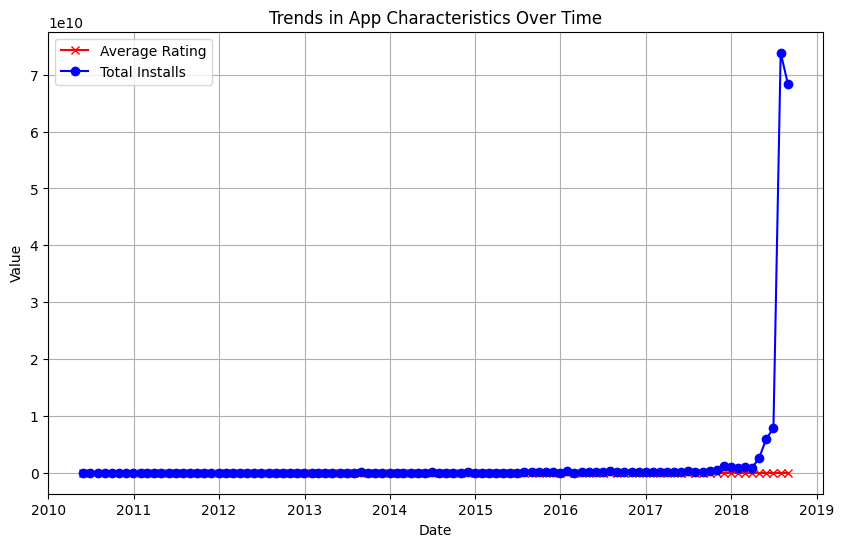

In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y', errors='coerce')
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

monthly_stats = data.resample('M', on='Last Updated').agg({'Rating': 'mean', 'Installs': 'sum'})

plt.figure(figsize=(10, 6))

plt.plot(monthly_stats.index, monthly_stats['Rating'], marker='x', color='red', label='Average Rating')

plt.plot(monthly_stats.index, monthly_stats['Installs'], marker='o', color='blue', label='Total Installs')

plt.title('Trends in App Characteristics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#**6. Impact of Reviews on Ratings**
* **Task:** Investigate the correlation between the number of reviews an app receives and its rating.
Determine if more reviews are indicative of higher ratings.
* **Skills Assessed:** Correlation analysis, scatter plot visualization.

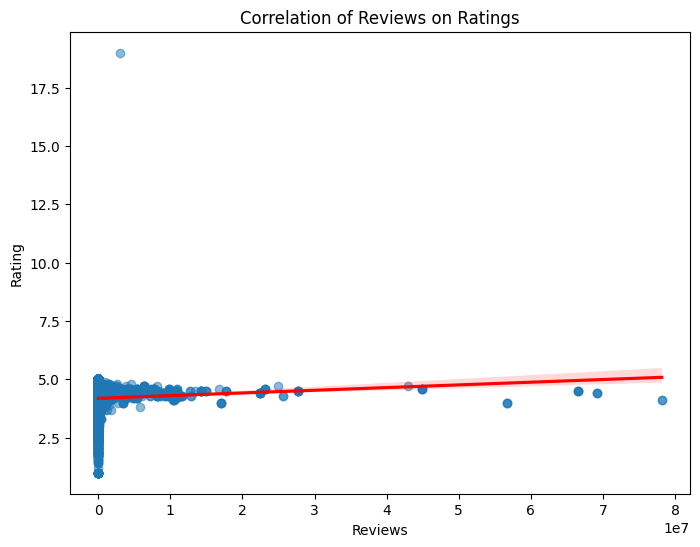

Correlation coefficient between Reviews and Rating: 0.06752263530607043


In [ ]:
correlation = data['Reviews'].corr(data['Rating'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Reviews'], data['Rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('App Rating')
plt.title(f'Correlation of Reviews on Ratings')
sns.regplot(x='Reviews', y='Rating', data=data, scatter=False, color='red')
plt.show()
print('Correlation coefficient between Reviews and Rating:', correlation)
